In [16]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets 
digits = datasets.load_digits()
x = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=666)

from sklearn.linear_model import   LogisticRegression
 
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)#############penalty='l2  :默认使用L2
decision_scores = log_reg.decision_function(x_test)


In [18]:
np.max(decision_scores)

19.889609256987644

In [19]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype = 'int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

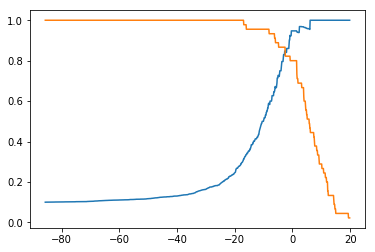

In [21]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)

# precision-recall曲线

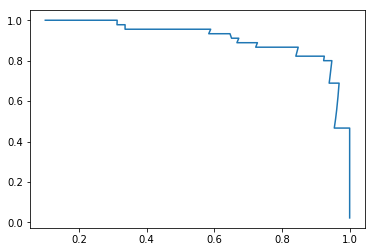

In [22]:
plt.plot(precisions, recalls)

# scikit-learn中的Precision-Recall曲线

In [23]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [25]:
precisions.shape

(145,)

In [26]:
recalls.shape

(145,)

In [27]:
thresholds.shape

(144,)

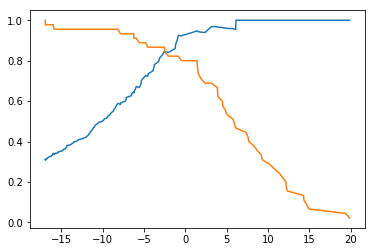

In [28]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])

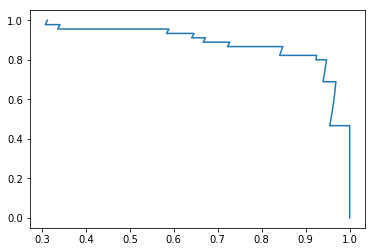

In [29]:
plt.plot(precisions, recalls)